In [76]:
#Import packages
import numpy as np
import pandas as pd

In [77]:
#Load in the data. Since Date column is in the data, we parse the dates when reading in the data.
data = pd.read_csv('../input/covid19-algeria-and-world-dataset/Data.csv',parse_dates=['Date'])

#Peek at the first 5 rows of data
data.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN


In [78]:
#Let's check how many countries are indicated in the data
data["Entity"].value_counts()
#There are 104 countries

Mexico           425
Thailand         421
Argentina        404
United States    404
Japan            404
                ... 
Cape Verde       346
Uganda           345
Mozambique       344
Myanmar          339
Malawi           334
Name: Entity, Length: 104, dtype: int64

In [79]:
#Check shape of data
data.shape

(38472, 15)

In [80]:
#Check summary statistics of data
data.describe()
#We notice that there are some columns where the values would be consistently the same for each country.
#These columns are possibly Latitude, Longitude, Average temperature per year, Hospital beds per 1000 people, Medical doctors per 1000 people, GDP/Capita, Population, Median age, Population aged 65 and over(%)

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [81]:
# Let's check summary statistics for Albania, to see if those previously identified columns have constant values
data[data["Entity"]=="Albania"].describe()
#Latitude, Longitude,Average temperature per year, Hospital beds per 1000 people, Medical doctors per 1000 people, GDP/Capita, Population, Median age, Population aged 65 and over(%) are all constant.
#Let's confirm this with another country

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,3.700000e+02,3.700000e+02,370.0,3.700000e+02,3.700000e+02,3.700000e+02,370.0,370.0,370.0,363.000000,357.000000,355.000000
mean,4.115000e+01,2.017000e+01,14.0,2.890000e+00,1.290000e+00,5.353200e+03,2873457.0,38.0,14.0,1192.831956,23603.591036,484.202817
std,7.115049e-15,3.557524e-15,0.0,4.446905e-16,2.223453e-16,9.107262e-13,0.0,0.0,0.0,1198.268551,29374.004175,515.927324
min,4.115000e+01,2.017000e+01,14.0,2.890000e+00,1.290000e+00,5.353200e+03,2873457.0,38.0,14.0,1.000000,2.000000,1.000000
25%,4.115000e+01,2.017000e+01,14.0,2.890000e+00,1.290000e+00,5.353200e+03,2873457.0,38.0,14.0,259.000000,1232.000000,34.000000
50%,4.115000e+01,2.017000e+01,14.0,2.890000e+00,1.290000e+00,5.353200e+03,2873457.0,38.0,14.0,812.000000,9844.000000,306.000000
75%,4.115000e+01,2.017000e+01,14.0,2.890000e+00,1.290000e+00,5.353200e+03,2873457.0,38.0,14.0,1916.500000,39014.000000,830.500000
max,4.115000e+01,2.017000e+01,14.0,2.890000e+00,1.290000e+00,5.353200e+03,2873457.0,38.0,14.0,4562.000000,107167.000000,1796.000000


In [82]:
# Let's check summary statistics for United States, to see if those previously identified columns have constant values
data[data["Entity"]=="United States"].describe()
#It is confirmed that Latitude, Longitude,Average temperature per year, Hospital beds per 1000 people, Medical doctors per 1000 people, GDP/Capita, Population, Median age, Population aged 65 and over(%) are all constant.
#If we were to group the data, using mean would not have an adverse effect on all these columns.

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,4.040000e+02,4.040000e+02,404.0,404.00,404.00,404.0,404.0,404.0,404.0,3.600000e+02,4.040000e+02,366.000000
mean,3.709000e+01,-9.571000e+01,11.0,2.77,2.57,65297.5,325719178.0,38.0,16.0,9.122363e+05,7.991328e+06,199648.846995
std,1.422848e-14,1.422848e-14,0.0,0.00,0.00,0.0,0.0,0.0,0.0,5.826952e+05,8.724439e+06,137270.390288
min,3.709000e+01,-9.571000e+01,11.0,2.77,2.57,65297.5,325719178.0,38.0,16.0,1.830000e+02,1.000000e+00,1.000000
25%,3.709000e+01,-9.571000e+01,11.0,2.77,2.57,65297.5,325719178.0,38.0,16.0,4.556442e+05,1.136458e+06,107626.500000
50%,3.709000e+01,-9.571000e+01,11.0,2.77,2.57,65297.5,325719178.0,38.0,16.0,8.852305e+05,5.117452e+06,183487.000000
75%,3.709000e+01,-9.571000e+01,11.0,2.77,2.57,65297.5,325719178.0,38.0,16.0,1.293433e+06,1.187371e+07,270102.000000
max,3.709000e+01,-9.571000e+01,11.0,2.77,2.57,65297.5,325719178.0,38.0,16.0,2.238400e+06,2.860567e+07,513091.000000


In [83]:
#Check type of value in each column
data.dtypes
#Values seem to be in an expected format.

Entity                                     object
Continent                                  object
Latitude                                  float64
Longitude                                 float64
Average temperature per year                int64
Hospital beds per 1000 people             float64
Medical doctors per 1000 people           float64
GDP/Capita                                float64
Population                                  int64
Median age                                  int64
Population aged 65 and over (%)             int64
Date                               datetime64[ns]
Daily tests                               float64
Cases                                     float64
Deaths                                    float64
dtype: object

In [84]:
# Check the earliest date when data is recorded
min(data['Date'])

Timestamp('2020-01-01 00:00:00')

In [85]:
# Check the last date when data is recorded
max(data['Date'])
# It seemed that the length of the data collected is slightly over a year.

Timestamp('2021-02-28 00:00:00')

In [86]:
#Check the continents captured in the data
data["Continent"].unique()
#6 continents are captured except for antarctica 

array(['Europe', 'Africa', 'South America', 'Oceania', 'Asia',
       'North America'], dtype=object)

In [87]:
# Check number of missing values in each column of data
missing_val_count_by_column = (data.isnull().sum())
missing_val_count_by_column
#There are missing values for daily tests, Cases and Deaths
#We check if there are any patterns in the missing data.
#Based on our earlier statistical summary, it was observed that the minimum record of death and cases are both 1. However, it is possible that there is days where there are no reported deaths or cases.
#As such, the NA values for deaths are likely to represent that there are no recorded deaths or cases, either due to actual 0 deaths or cases that day, human error in recording or data was not available.
#As we cannot definitely rule out a reason for the missing data and to prevent biasness in data, it is wiser to remove all data with missing cases or deaths data.
#For Daily tests, the minimum recorded value was 183. It is unlikely that there are no tests conducted on that day. Its characteristics is fundamentally different from death and number of cases.
#We can leave NA values in daily tests as it is.

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [88]:
# Get dates of Cases with missing values
cases_with_missing = data[data["Cases"].isnull()]["Date"].unique()
cases_with_missing

array(['2020-02-25T00:00:00.000000000', '2020-02-26T00:00:00.000000000',
       '2020-02-27T00:00:00.000000000', '2020-02-28T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
       '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18

In [89]:
len(cases_with_missing)
#There seemed to be no pattern in missing data e.g. few specific dates where data is missing.
#There are 82 unique dates out of 254 missing values

82

In [90]:
# Get dates of Deaths with missing values
deaths_with_missing = data[data["Deaths"].isnull()]["Date"].unique()
deaths_with_missing

array(['2020-02-25T00:00:00.000000000', '2020-02-26T00:00:00.000000000',
       '2020-02-27T00:00:00.000000000', '2020-02-28T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', '2020-01-15

In [91]:
len(deaths_with_missing)
#There seemed to be no pattern in missing data e.g. few specific dates where data is missing.
#There are 373 unique dates out of 3610 missing values

373

In [92]:
#Since there are no patterns in the missing data, we remove any rows with missing Cases and Deaths values
data_clean=data.dropna(axis=0,subset=["Deaths","Cases"])
#Check that there are no more missing values in Cases and Deaths
data_clean.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        5993
Cases                                 0
Deaths                                0
dtype: int64

In [93]:
#Check number of rows left
data_clean.shape
#Number of rows left is 28869. Let's check what is the % of original data remaining
percent_left=len(data_clean)*100/len(data)
percent_left
#90.6% of data is left, which is still significant for us to run our analysis

90.616552297775

In [94]:
#To load our dataframe into sqlite 3 database, the column names should not have any spaces. Let's change the column names
data_clean.columns = ["Entity", "Continent","Latitude","Longitude", "Average_temperature_per_year","Hospital_beds_per_1000_people","Medical_doctors_per_1000_people","GDP_per_Capita","Population","Median_age","Population_aged_65_and_over_percent","Date","Daily_tests","Cases","Deaths"]

In [95]:
#We load our dataframe into sqlite3 database
import sqlite3
sqliteConnection = sqlite3.connect('covid.db')
# Create cursor object
c = sqliteConnection.cursor()

In [96]:
#Create table to store the data
c.execute('CREATE TABLE IF NOT EXISTS covid (Entity text, Continent number,Latitude number,Longitude number, Average_temperature_per_year number,Hospital_beds_per_1000_people number,Medical_doctors_per_1000_people number,GDP_per_Capita number,Population number,Median_age number,Population_aged_65_and_over_percent number,Date date,Daily_tests number, Cases number,Deaths number)')
sqliteConnection.commit()

In [97]:
#Load dataframe into sqlite3 database
data_clean.to_sql('covid', sqliteConnection, if_exists='replace', index = False)

In [98]:
# Let's check if data has been loaded properly by making a query
c.execute('''  
SELECT COUNT(*) FROM covid
          ''')
for row in c.fetchall():
    print(row)
    
#All rows of data has been loaded correctly.

(34862,)


In [99]:
# Let's check if the information is correct.
c.execute('''  
SELECT * FROM covid LIMIT 5
          ''')
for row in c.fetchall():
    print(row)
    
#Information seemed to have been loaded properly as well.

('Albania', 'Europe', 41.15, 20.17, 14, 2.89, 1.29, 5353.2, 2873457, 38, 14, '2020-03-11 00:00:00', 43.0, 12.0, 1.0)
('Albania', 'Europe', 41.15, 20.17, 14, 2.89, 1.29, 5353.2, 2873457, 38, 14, '2020-03-12 00:00:00', 141.0, 23.0, 1.0)
('Albania', 'Europe', 41.15, 20.17, 14, 2.89, 1.29, 5353.2, 2873457, 38, 14, '2020-03-13 00:00:00', 159.0, 33.0, 1.0)
('Albania', 'Europe', 41.15, 20.17, 14, 2.89, 1.29, 5353.2, 2873457, 38, 14, '2020-03-14 00:00:00', 48.0, 38.0, 1.0)
('Albania', 'Europe', 41.15, 20.17, 14, 2.89, 1.29, 5353.2, 2873457, 38, 14, '2020-03-15 00:00:00', 27.0, 42.0, 1.0)


In [100]:
#For the first visualisation, we want to see compare the percentage of deaths with regards to the number of cases, based on varying continents on a monthly basis.
c.execute('''  
SELECT strftime('%Y-%m', Date) AS year_month,Continent,SUM(Deaths)*100/SUM(Cases) AS Percentage_of_deaths
FROM covid
GROUP BY year_month,Continent
ORDER BY year_month ASC
          ''')
#Convert our query results into dataframe
df_deathpercent = pd.DataFrame(c.fetchall(), columns = ["Date","Continent","Percentage of Deaths per Case (%)"])

In [101]:
#We convert the date to datetime and set it as the index
df_deathpercent["Date"]=pd.to_datetime(df_deathpercent["Date"])
df_deathpercent=df_deathpercent.set_index("Date")

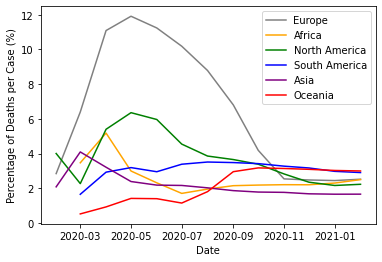

In [102]:
#Import matplotlibpyplot for plotting of graphs
import matplotlib.pyplot as plt
#Plot line graph to compare the percentage of deaths with regards to the number of cases, based on varying continents on a monthly basis.
plt.plot(df_deathpercent[df_deathpercent["Continent"]=="Europe"].index,df_deathpercent[df_deathpercent["Continent"]=="Europe"]["Percentage of Deaths per Case (%)"],label="Europe",color="gray")
plt.plot(df_deathpercent[df_deathpercent["Continent"]=="Africa"].index,df_deathpercent[df_deathpercent["Continent"]=="Africa"]["Percentage of Deaths per Case (%)"],label="Africa",color="orange")
plt.plot(df_deathpercent[df_deathpercent["Continent"]=="North America"].index,df_deathpercent[df_deathpercent["Continent"]=="North America"]["Percentage of Deaths per Case (%)"],label="North America",color="green")
plt.plot(df_deathpercent[df_deathpercent["Continent"]=="South America"].index,df_deathpercent[df_deathpercent["Continent"]=="South America"]["Percentage of Deaths per Case (%)"],label="South America",color="blue")
plt.plot(df_deathpercent[df_deathpercent["Continent"]=="Asia"].index,df_deathpercent[df_deathpercent["Continent"]=="Asia"]["Percentage of Deaths per Case (%)"],label="Asia",color="purple")
plt.plot(df_deathpercent[df_deathpercent["Continent"]=="Oceania"].index,df_deathpercent[df_deathpercent["Continent"]=="Oceania"]["Percentage of Deaths per Case (%)"],label="Oceania",color="red")
plt.xlabel("Date")
plt.ylabel("Percentage of Deaths per Case (%)")
plt.legend()
plt.show()
#We can see that Europe almost consistently has highest percentage of deaths per case. 
#The peaks of Europe and North America interestingly concided with each other, at May-2020, relatively in the earlier time periods.
#The peaks of Africa, Asia were observed in around Apr-2020 and Mar-2020 respectively, and are relatively in the earlier time periods.
#South America experienced its peak at around Aug-2020 and Oceania experienced its peak around Oct-2020, which are relatively in the later time periods.
#Interestingly, if we have more data e.g. vaccination takeup rate, date when stringent covid measures were implemented,etc.,  we could explore the reason behind the time which each continent experienced its peak.

#Next, let's average the percentage of deaths per case over the entire time period and plot a bar graph to visualise it.

In [103]:
#For the second visualisation, we average the percentage of deaths per case over the entire time period and plot a bar graph to visualise it.
c.execute('''  
SELECT Continent,SUM(Deaths)*100/SUM(Cases) AS Percentage_of_deaths
FROM covid
GROUP BY Continent
ORDER BY Continent ASC
          ''')
#Convert our query results into dataframe
df_deathpercent_avg = pd.DataFrame(c.fetchall(), columns = ["Continent","Percentage of Deaths per Case (%)"])

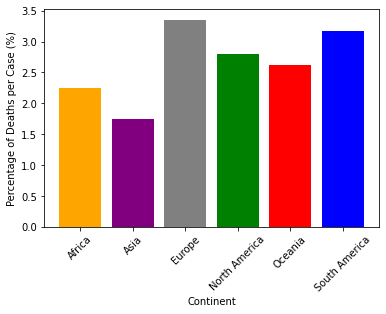

In [104]:
#Plot bar chart to compare Population aged 65 and over with regards to the continents
plt.bar(df_deathpercent_avg["Continent"], df_deathpercent_avg["Percentage of Deaths per Case (%)"],color=["orange","purple","gray","green","red","blue"])
plt.xlabel("Continent")
plt.ylabel("Percentage of Deaths per Case (%)")
plt.xticks(rotation = 45)
plt.show()
#We can see that Europe has the highest average percentage of deaths per case, followed closely by South America.
#Asia has the lowest average percentage of deaths per case.

#Why is this so? Is it related to age of the people infected with covid? It is possible that people with older age are more vulnerable to serious complications. Let's take a look at the median age and Population aged 65 and over (%).
#Next, let's compare the Median Age and Population aged 65 and over with regards to the continents and plot bar graphs.

In [105]:
#For the third and fourth visualisation, we want to compare the Median Age and Population aged 65 and over with regards to the continents and plot bar graphs.
c.execute('''  
SELECT Continent,AVG(Median_age) AS Average_Median_Age,AVG(Population_aged_65_and_over_percent) AS Average_Population_aged_65_and_over
FROM covid
GROUP BY Continent
          ''')
#Convert our query results into dataframe
df_age = pd.DataFrame(c.fetchall(), columns = ["Continent","Average Median Age","Average Percentage of Population Aged 65 and Over"])

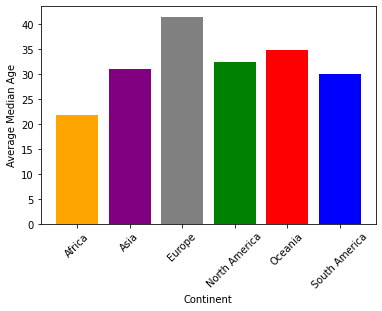

In [106]:
#Plot bar chart to compare Population aged 65 and over with regards to the continents
plt.bar(df_age["Continent"], df_age["Average Median Age"],color=["orange","purple","gray","green","red","blue"])
plt.xlabel("Continent")
plt.ylabel("Average Median Age")
plt.xticks(rotation = 45)
plt.show()
#We can see that Europe has the highest median age followed by Oceania, with Africa having the least median age.
#It seemed that Europe having the highest median age corresponded to its highest percentage of deaths per case.
#However, it does not help to explain for the rest of the other countries. For example, although Africa has the least median age, it does not have the least percentage of deaths per case.

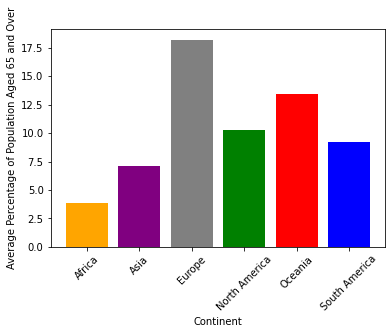

In [107]:
#Plot bar chart to compare the Median Age and Population aged 65 and over with regards to the continents
plt.bar(df_age["Continent"], df_age["Average Percentage of Population Aged 65 and Over"],color=["orange","purple","gray","green","red","blue"])
plt.xlabel("Continent")
plt.ylabel("Average Percentage of Population Aged 65 and Over")
plt.xticks(rotation = 45)
plt.show()
#We can see that Europe has the highest population aged 65 and over, followed by Oceania, with Africa having the least value.
#It seemed that Europe having the highest value corresponded to its highest percentage of deaths per case.
#However, it does not help to explain for the rest of the other countries. For example, although Africa has the least value, it does not have the least percentage of deaths per case.

#Could it be instead due to adequacy of medical attention? Let's take a look at the hospital beds and medical doctors.

In [108]:
#For the fifth and sixth visualisation, we want to compare the hospital beds and medical doctors with regards to the continents, and plot bar graphs.
c.execute('''  
SELECT Continent,AVG(Hospital_beds_per_1000_people) AS Average_Hospital_beds_per_1000_people, AVG(Medical_doctors_per_1000_people) AS Average_Medical_doctors_per_1000_people
FROM covid
GROUP BY Continent ''')
#Convert our query results into dataframe
df_medical = pd.DataFrame(c.fetchall(), columns = ["Continent","Average Hospital Beds per 1000 people","Average Medical Doctors per 1000 people"])

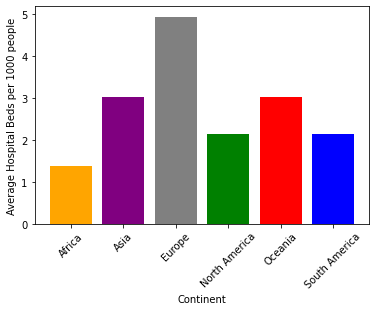

In [109]:
#Plot bar chart to compare hospital beds with regards to the continents
plt.bar(df_medical["Continent"], df_medical["Average Hospital Beds per 1000 people"],color=["orange","purple","gray","green","red","blue"])
plt.xlabel("Continent")
plt.ylabel("Average Hospital Beds per 1000 people")
plt.xticks(rotation = 45)
plt.show()
#We can see that Europe has the highest average hospital beds per 1000 people, with Africa having the least.
#This is counterintuitive as we expect that having the least average hospital beds should have the highest percentage of deaths (insufficient medical attention).
#For example, although Africa has the least average hospital beds, it does not have the highest percentage of deaths.

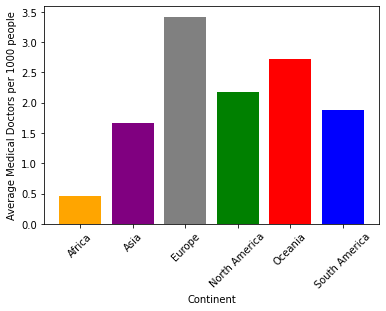

In [110]:
#Plot bar chart to compare medical doctors with regards to the continents
plt.bar(df_medical["Continent"], df_medical["Average Medical Doctors per 1000 people"],color=["orange","purple","gray","green","red","blue"])
plt.xlabel("Continent")
plt.ylabel("Average Medical Doctors per 1000 people")
plt.xticks(rotation = 45)
plt.show()
#We can see that Europe has the highest average medical doctors per 1000 people, with Africa having the least.
#This is counterintuitive as we expect that having the least average medical doctors should have the highest percentage of deaths (insufficient medical attention).
#For example, although Africa has the least average medical doctors, it does not have the highest percentage of deaths.

#The high percentage of deaths per 1000 people could not explained (inconclusive). We do require more data, such as the population density, vaccination data, etc.